In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


In [2]:

style.use('fivethirtyeight')
columns = ["CudaCores", "BaseClock", "BoostClock", "MemorySpeed", "MemoryConfig", "MemoryBandwidth", "BenchmarkSpeed"
           ]

# names=["cudaCores", "baseClock", "BoostClock"]
df = pd.read_csv('datasets/GPUbenchmark.csv', header=None)

X = np.array(df.drop(columns=6, axis=1))
y = np.array(df.loc[:, 6])


In [3]:

def getColor(y):
    return ['b', 'g', 'r', 'c', 'm', 'y'][y]


def get_score(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    return score


def crossFold(model, X, y, k):
    kf = KFold(n_splits=k)

    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        score = get_score(model, X_train, y_train, X_test, y_test)
        scores.append(score)
    return scores


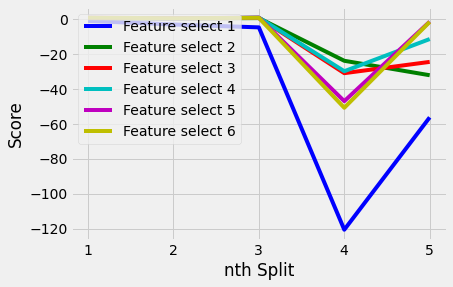

In [4]:


k = 5
p = len(X[0])

models = []
for i in range(1, 7, 1):
    model = LinearRegression()

    select_X = X.T[0:i].T
    scores = crossFold(model, select_X, y, k)
    models.append([scores, i])

# plot
lineX = [i for i in range(1, k + 1)]
lineYs = []
for scores, i in models:
    lineYs.append(scores)

for i, lineY in enumerate(lineYs):
    plt.plot(lineX, lineY, color=getColor(i),
             label="Feature select {}".format(i + 1))

plt.xlabel("nth Split")
plt.ylabel("Score")
plt.legend(loc='upper left')
plt.show()
